In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Shape of an individual sample:", x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


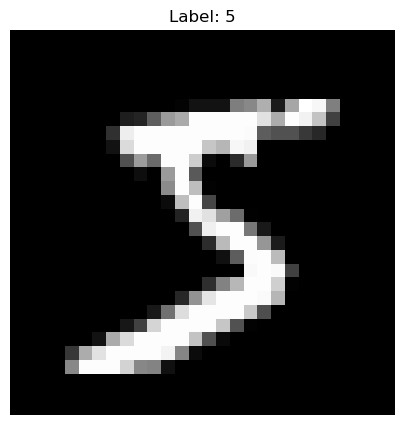

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4752 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9258


In [10]:
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")
model.fit(x_train_flattened, y_train, epochs=5)

313/313 [==============================] - 2s 4ms/step - loss: 0.2695 - accuracy: 0.9253
Test loss: 0.2695, Test accuracy: 0.9253
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2578 - accuracy: 0.9289
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2557 - accuracy: 0.9288
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2531 - accuracy: 0.9298
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2513 - accuracy: 0.9304


In [11]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 4ms/step


In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

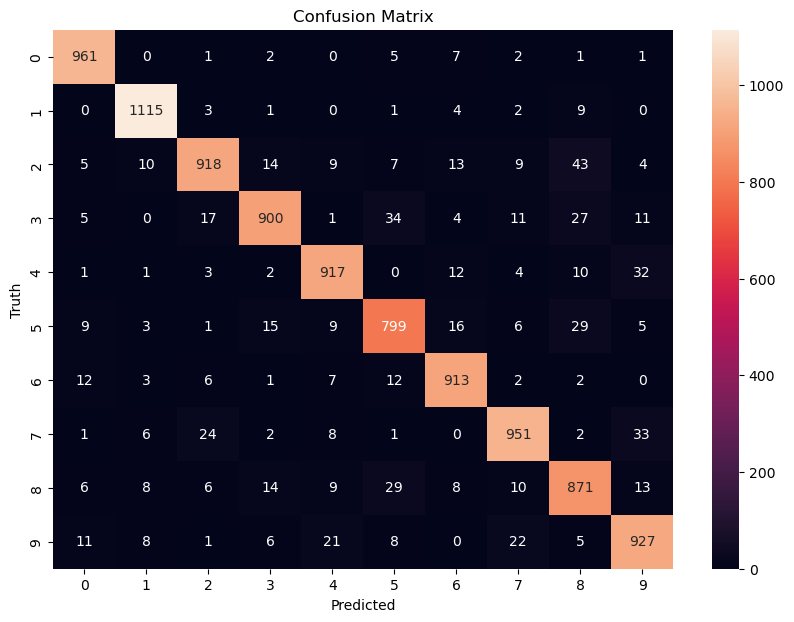

In [13]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model with Hidden Layer
model_with_hidden.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2809 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1285 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0900 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0683 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0537 - accuracy: 0.9836


In [15]:
hidden_test_loss, hidden_test_accuracy = model_with_hidden.evaluate(x_test_flattened, y_test)
print(f"Test accuracy with hidden layer: {hidden_test_accuracy:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0827 - accuracy: 0.9743
Test accuracy with hidden layer: 0.9743


In [16]:
sample_indices = np.random.randint(0, len(x_test), size=5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Flatten the sample images
sample_images_flattened = sample_images.reshape(len(sample_images), -1)

sample_predictions = model_with_hidden.predict(sample_images_flattened)
predicted_classes = np.argmax(sample_predictions, axis=1)

1/1 [==============================] - 0s 140ms/step


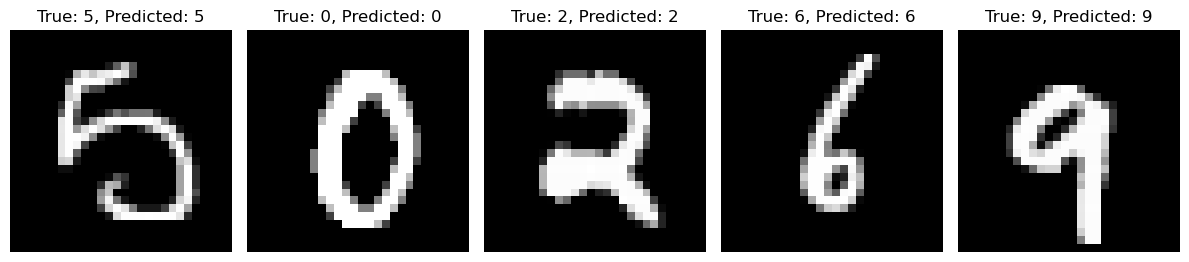

In [17]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()